# Using permutation_test

In [1]:
# pip install permutation_testing

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
plt.rcParams.update({'font.size': 16}) 
from permutation_testing import permutation_test
import scipy.stats as stats


Bad key font.name in file /Users/duncan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/SCARRLab.mplstyle, line 4 ('font.name : times-new-roman')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution


## Generate some data 

In [3]:
# create data 
A = np.random.normal(0,1,[50,])
B = np.random.normal(0,1,[50,])

# create assignment 
assignA = [0] * 50
assignB = [1] * 50

# concatenate 
data = np.concatenate((A,B))
assignment = np.concatenate((assignA, assignB))

### Two independent samples [compare means]

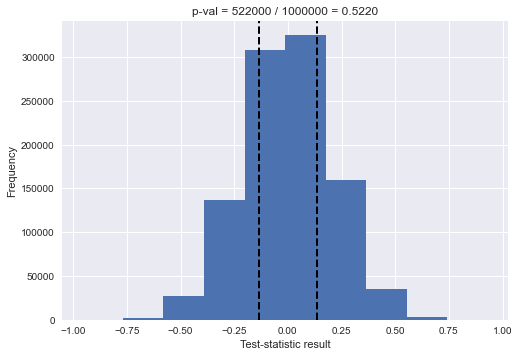

In [4]:
# no parallel computing 
p = permutation_test(data1=A, data2=B, vis=True)

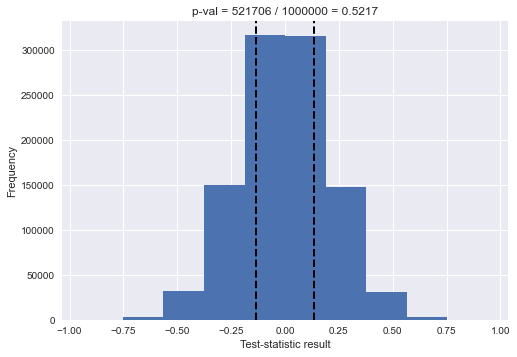

In [5]:
# parallel computing 
p = permutation_test(data1=A, data2=B, vis=True, parQuick=True)

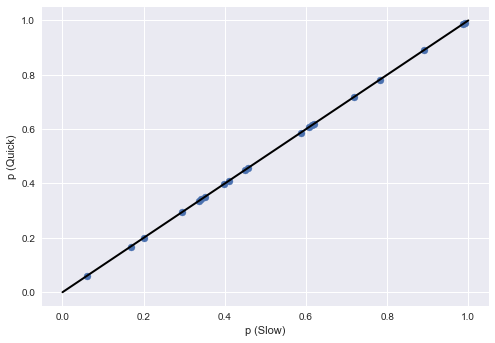

In [6]:
# does parQuick=True and parQuick=False give similar answers ?
N = 20
pQuick = np.empty(N) 
pSlow = np.empty(N) 
# create assignment 
assignA = [0] * 50
assignB = [1] * 50
# concatenate 
assignment = np.concatenate((assignA, assignB))
mu2 = np.linspace(-0.1, 0.1, 20)

# iterate
for i in range(N): 
    # generate data 
    data1 = np.random.normal(0,1,[50,])
    data2 = np.random.normal(mu2[i],1,[50,])
    # slow 
    pS = permutation_test(data1=data1, data2=data2, parQuick=False)
    pSlow[i] = pS
    # fast 
    pQ = permutation_test(data1=data1, data2=data2, parQuick=True)
    pQuick[i] = pQ

plt.figure()
plt.plot([0, 1], [0, 1], c='k', ls='-', lw=2)
plt.scatter(pSlow, pQuick)
plt.xlabel('p (Slow)')
plt.ylabel('p (Quick)')
plt.show()

## Testing against parametric tests

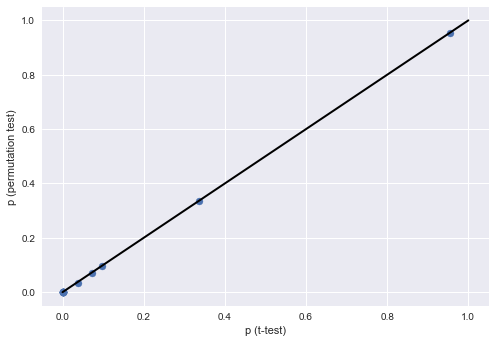

In [7]:
# set up 
N = 20 
ttestp = [] 
permtestp = []
# create assignment 
assignA = [0] * 10
assignB = [1] * 10
# concatenate 
assignment = np.concatenate((assignA, assignB))

# iterate
for i in range(N): 
    # generate data 
    mu1 = np.random.normal(0, 3, [1,])
    mu2 = np.random.normal(0, 3, [1,])
    data1 = np.random.normal(mu1,1,[10,])
    data2 = np.random.normal(mu2,1,[10,])
    # ttest2
    _, p = stats.ttest_ind(data1, data2, equal_var=False)
    ttestp.append(p)
    # BET 
    p = permutation_test(data1=data1, data2=data2, parQuick=True)
    permtestp.append(p)

plt.figure()
plt.plot([0, 1], [0,1], c='k', ls='-', lw=2)
plt.scatter(ttestp, permtestp)
plt.xlabel('p (t-test)')
plt.ylabel('p (permutation test)')
plt.show()

In [8]:
# other alternatives besides less and greater
N = 10
pQuick = np.empty(N) 
pSlow = np.empty(N) 
# create assignment 
assignA = [0] * 50
assignB = [1] * 50
# concatenate 
assignment = np.concatenate((assignA, assignB))
mu2 = np.linspace(-0.1, 0.1, 10)

# iterate
for i in range(N): 
    # generate data 
    data1 = np.random.normal(0,1,[50,])
    data2 = np.random.normal(mu2[i],1,[50,])
    # fast 
    pQ = permutation_test(data1=data1, data2=data2, parQuick=True, vis=False, alternative='greater')